# ISLR - Chapter 3 - (Exercises/Applied/Question 8 and 9)

<font color='green'> 
**An Introduction to Statistical Learning with Applications in R**  

Chapter 3 - 3.7 Exercises/Applied bölümünde [Auto.csv](https://book.huihoo.com/introduction-to-statistical-learning/data.html) verisini kullanarak 8 ve 9.soruyu cevaplandırdım. 
</font>

### İçindekiler

I created simple linear regression and multiple linear regression on [Auto.csv](https://book.huihoo.com/introduction-to-statistical-learning/data.html) dataset and performed below operations using statsmodels, scipy, matplotlib, seaborn library.
-	Prediction of the confidence interval and prediction interval of the response based on a given variable value,
-	Evaluating the relationship between the predictors and response based on model’s statistical values (like R-squared, F-statistic, Prob (F-statistic), p-value, coefficients),
-	Displaying least-squares regression line,
-	Plotting the residuals, studentized residuals, and the leverages,
-	Fitting linear regression models with interaction effects,
-	Trying a few different transformations of the variables, such as log(X), √X, X2.

## Question 8

**8.** This question involves the use of simple linear regression on the Auto data set.

### (a) 

<font color='blue'> *Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:* </font>

#### <font color='purple'> Loading Dataset</font>

##### <font color='green'>Veriyi yüklüyorum ve `auto.info()` fonksiyonuyla inceliyorum. </font>

In [23]:
import pandas as pd

In [24]:
auto = pd.read_csv("Auto.csv")

In [25]:
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [26]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [27]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


##### <font color='green'>`horsepower`'ın veri tipi object görünüyor integer olması gerekirdi. Bu yüzden bunu inceliyorum.</font>

In [28]:
auto["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

##### <font color='green'> Burada soru işareti (?) var. Onu baştan NaN olarak kabul etmek için veriyi yüklerken bunu belirtiyorum. </font>

In [29]:
auto = pd.read_csv("Auto.csv", na_values='?')
df = auto.copy()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


**horsepower float oldu şimdi. Fakat 5 adet NaN değer ortaya çıktı.**

In [31]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### <font color='purple'> Preprocessing</font>

<font color='green'> **horsepowerdaki NaN olan gözlemleri inceleyip bunları sütunun ortalamasıyla dolduruyorum.** </font>

###### **Bunların hangi gözlemler olduğuna bakıyorum.**

In [32]:
df[df.isnull().any(axis=1)]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i

###### **Her bir aracın türüne göre beygir güçlerinin ne olduğuna bakıyorum.**

*ford pinto için*

In [33]:
df[df["name"]== "ford pinto"]["horsepower"]

32      NaN
112    85.0
130    80.0
168    83.0
174    97.0
206    72.0
Name: horsepower, dtype: float64

In [34]:
df[df["name"]== "ford pinto"]["horsepower"].mean() # NaN'ı dikkate almıyor.

83.4

*ford maverick için*

In [35]:
df[df["name"]== "ford maverick"]["horsepower"]

17     85.0
100    88.0
126     NaN
155    72.0
193    81.0
Name: horsepower, dtype: float64

In [36]:
df[df["name"]== "ford maverick"]["horsepower"].mean()

81.5

*renault lecar deluxe için*

In [37]:
df[df["name"]== "renault lecar deluxe"]["horsepower"]

330   NaN
Name: horsepower, dtype: float64

In [38]:
df[df["name"]== "renault lecar deluxe"]["horsepower"].mean()

nan

*ford mustang cobra için*

In [39]:
df[df["name"]== "ford mustang cobra"]["horsepower"]

336   NaN
Name: horsepower, dtype: float64

In [40]:
df[df["name"]== "ford mustang cobra"]["horsepower"].mean()

nan

*renault 18i için*

In [41]:
df[df["name"]== "renault 18i"]["horsepower"]

354   NaN
Name: horsepower, dtype: float64

In [42]:
df[df["name"]== "renault 18i"]["horsepower"].mean()

nan

###### **Ortalamalarda çok fark olmadığı ve bazısı tek gözlem bulundurduğu için tüm horsepower sütununun ortalamasıyla doldurdum NaN değerleri.**

In [43]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())

In [44]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

**NaN değerleri yok etmiş olduk. Artık modelimizi çalıştırırken sıkıntı yaratmayacak.**

#### <font color='purple'> Creating Model with Statsmodel</font>

**Statsmodel ile simple lineer regression model kuruyorum.**

In [45]:
import statsmodels.api as sm

**Bağımsız değişkeni belirliyorum.**

In [46]:
X = df[["horsepower"]]

X.head()

horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

`X = df["horsepower"]` şeklinde de yazabilirdik. İki köşeli parantez birden fazla değişken olması durumunda kullanılıyor.

**Bağımlı değişkeni belirliyorum.**

In [47]:
y = df["mpg"]

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Statsmodelde bir de sabit eklemem gerekiyor modeli kurabilmek için.**

In [48]:
sm.add_constant(X).head()

const  horsepower
0    1.0       130.0
1    1.0       165.0
2    1.0       150.0
3    1.0       150.0
4    1.0       140.0

In [49]:
X = sm.add_constant(X)

In [50]:
X.head()

const  horsepower
0    1.0       130.0
1    1.0       165.0
2    1.0       150.0
3    1.0       150.0
4    1.0       140.0

**Modeli kuruyorum.**

In [51]:
lm = sm.OLS(y,X)
model = lm.fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.45e-79
Time:                        11:19:57   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.000      38.573      41.438
horsepower    -0.1578      0.007    -24.096      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       21.884   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.108
Skew:                           0.557   Prob(JB):                     5.82e-06
Kurtosis:                       3.464   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### i.
<font color='blue'>*Is there a relationship between the predictor and the response?* </font>

horsepower için katsayıyı -0.1578 bulmuş. p-value'su 0.05'ten küçük ve F-statistic 1'den büyük. 

Hipotezi, 
````
H0: Beta1 = 0 (null)
H1: Beta1 !=0 (alternatif)
````
olarak kurduğumuzda null hipotezi reddetmiş oluyoruz. Yani horsepower ile response arasında bir ilişki var. 

#### ii.

<font color='blue'>*How strong is the relationship between the predictor and the response?* </font>

R^2 değeri 0.595 çıktı. Yani mpg'deki değişkenliğini neredeyse %60'ı horsepower ile açıklanıyor. mpg değerlerinin ortalamasını yazsaydık 0 olarak tahmin edecekti. Ortalamadan çok daha iyi bir iş çıkarmış.

#### iii.

<font color='blue'>*Is the relationship between the predictor and the response positive or negative?* </font>

Katsayı negatif olduğu için horsepower ile mpg arasındaki ilişki negatif. Horsepower'ın bir birimlik artışında mpg 0.158 azalıyor.

#### iv.

<font color='blue'>*What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?*</font>

##### <font color='green'>horsepower = 98 için tahmin edilen mpg değeri</font>

In [54]:
model.params

const         40.005812
horsepower    -0.157845
dtype: float64

In [55]:
horsepower = 98
mpg_98 = model.params[0] + horsepower * model.params[1]
mpg_98

24.537027802797724

In [56]:
print("mpg = " + str("%.2f" % model.params[0]+ " + horsepower" + "*" + str("%.2f" % model.params[1])))

mpg = 40.01 + horsepower*-0.16


**horsepower=98 olan gözlemleri tespit ediyorum.**

In [57]:
df[df["horsepower"]==98]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
179  22.0          4         121.0        98.0    2945          14.5    75   
228  18.5          6         250.0        98.0    3525          19.0    77   

     origin          name  
179       2   volvo 244dl  
228       1  ford granada

**Bunların indekslerini direkt almak için `.index` ekliyorum ve listeye çeviriyorum.**

In [58]:
df[df["horsepower"]==98].index

Int64Index([179, 228], dtype='int64')

In [59]:
list(df[df["horsepower"]==98].index)

[179, 228]

**Bu değerleri `model.fittedvalues.loc[]` içerisine yazıyorum.**

In [60]:
# model.fittedvalues.loc[[179,228]]

In [61]:
model.fittedvalues.loc[list(df[df["horsepower"]==98].index)]

179    24.537028
228    24.537028
dtype: float64

##### <font color='green'>Tahmin aralığı ve güven aralığını buluyorum.</font>

###### **horsepower=98 için %95 doğrulukla tahmin aralığını hesaplıyorum.**

[Prediction Intervals for Machine Learning](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/) yazısından faydalandım.

````
interval = z * stdev
interval = 1.96 * stdev
lower, upper = y_pred - interval, y_pred + interval

````

*% 95 doğruluk oranıyla istediğimiz için z değeri 1.96. standart sapma residuallara ait standart sapma.*

In [72]:
import numpy as np

y_pred=model.predict(X)
resid = y-y_pred
stdev = np.sqrt(sum(resid**2) / (len(X) - 2))
stdev

4.985861637946169

In [64]:
# model.resid.values # bu şekilde de bulunabiliyor residuallar.

In [73]:
horsepower = 98
mpg_98 = model.params[0] + horsepower * model.params[1]

interval = 1.96 * stdev
lower, upper = mpg_98 - interval, mpg_98 + interval

In [74]:
lower, upper

(14.764738992423233, 34.309316613172214)

In [75]:
mpg_98

24.537027802797724

###### **horsepower=98 için %95 doğrulukla güven aralığını hesaplıyorum.**

In [76]:
# Güven aralığı-1. yöntem

import statsmodels.stats.api as sms
sms.DescrStatsW(df["mpg"]).tconfint_mean()

(22.743702133885893, 24.28803590137859)

In [77]:
# Güven aralığı-2. yöntem

import scipy.stats as st
st.t.interval(alpha=0.95, df=len(df["mpg"])-1, loc=np.mean(df["mpg"]), scale=st.sem(df["mpg"])) 

(22.7437021338859, 24.288035901378596)

Tahmin aralıkları güven aralıklarından daha geniştir. Çünkü hem indirgenebilir hatayı hem de indirgenemez hatayı içeriyor. Güven aralıkları ise sadece indirgenebilir hatayı içeriyor.

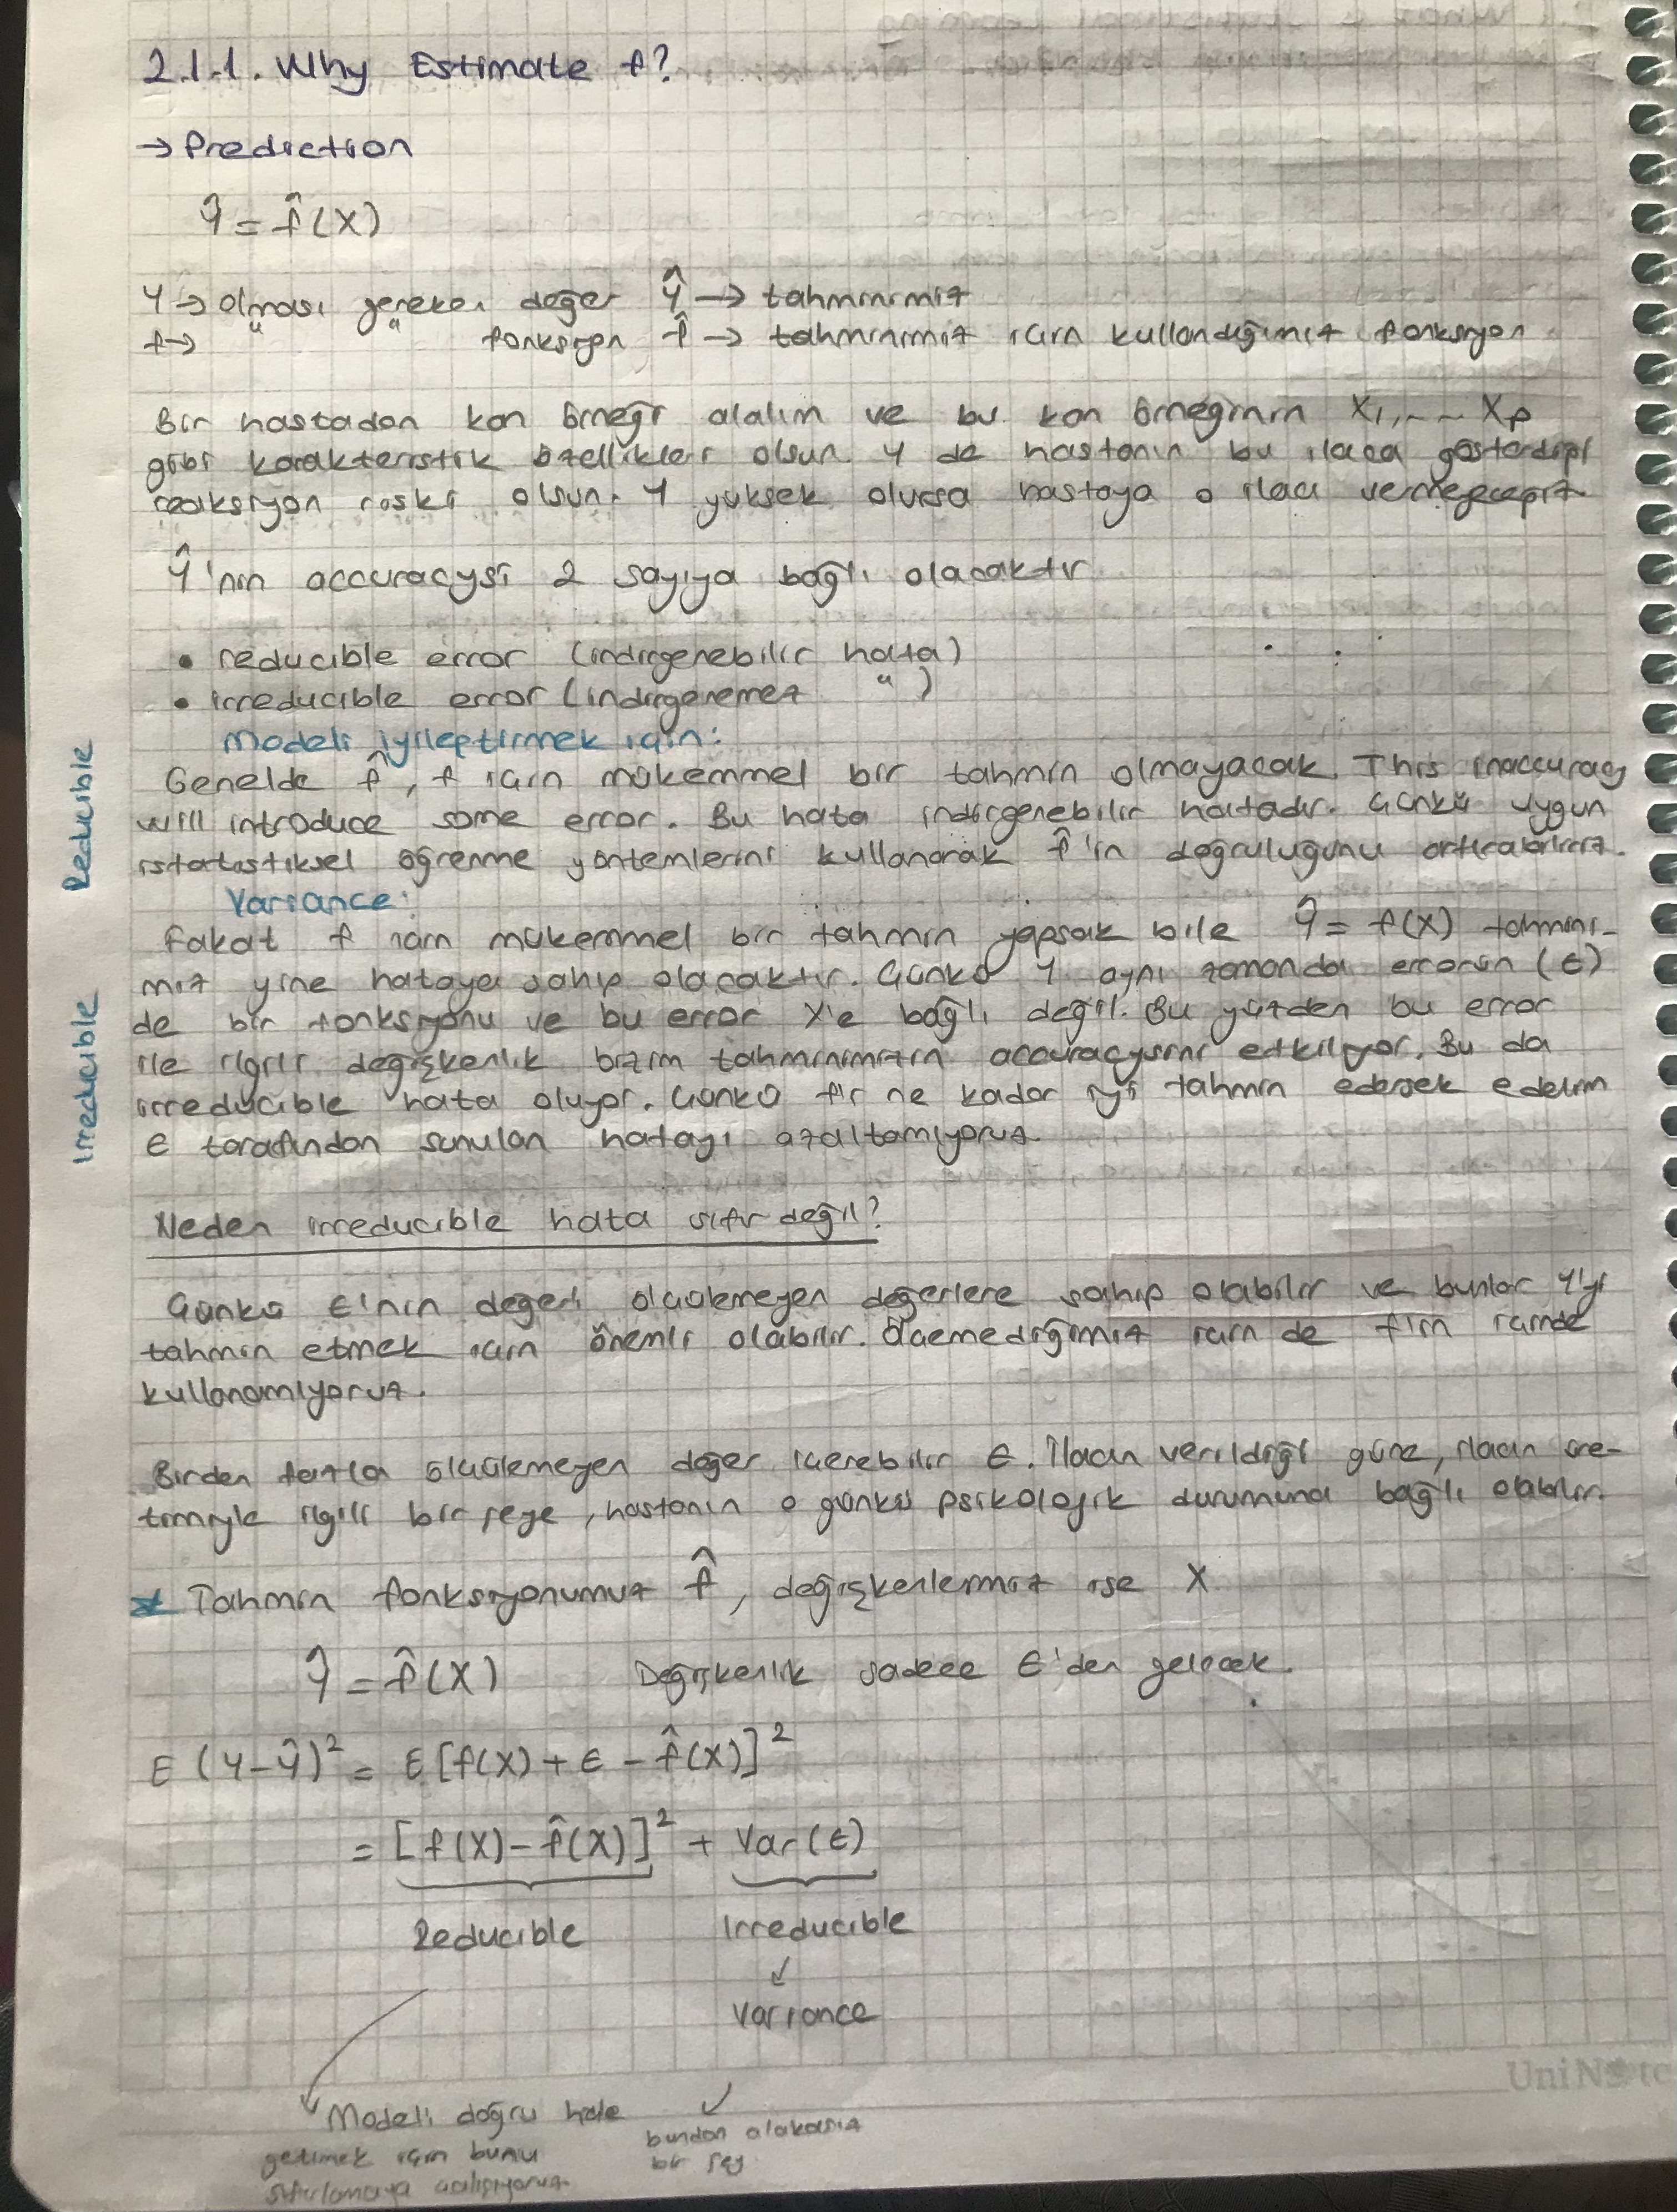

### (b) 
<font color='blue'> *Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.* </font>

In [110]:
# X["horsepower"].values #elimizdeki horsepower değişkenine ait değerler 

In [112]:
# model.fittedvalues # modelin bulduğu mpg değerleri

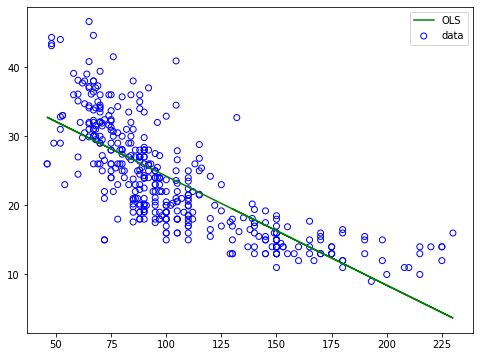

In [71]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,6))

# scatter data
ax.scatter(X["horsepower"].values, y.values, facecolors='none', edgecolors='b', label="data")

# plot estimate
ax.plot(X["horsepower"].values, model.fittedvalues, 'g', label="OLS")
ax.legend(loc='best');

### (c) 
<font color='blue'> *Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.* </font>

Plot the residuals, studentized residuals and the leverages.

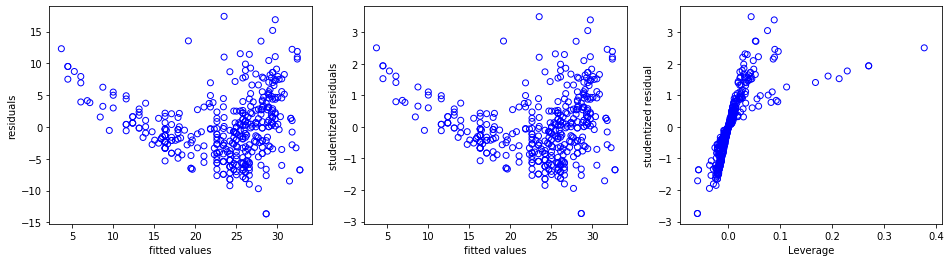

In [135]:
# Obtain the residuals, studentized residuals and the leverages

from statsmodels.stats.outliers_influence import OLSInfluence
fitted_values = model.fittedvalues
residuals = model.resid.values
studentized_residuals = OLSInfluence(model).resid_studentized_internal
leverages = OLSInfluence(model).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');

# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

## Question 9

**9.** This question involves the use of multiple linear regression on the Auto data set.

### (a) 

<font color='blue'> *Produce a scatterplot matrix which includes all of the variables in the data set.* </font>

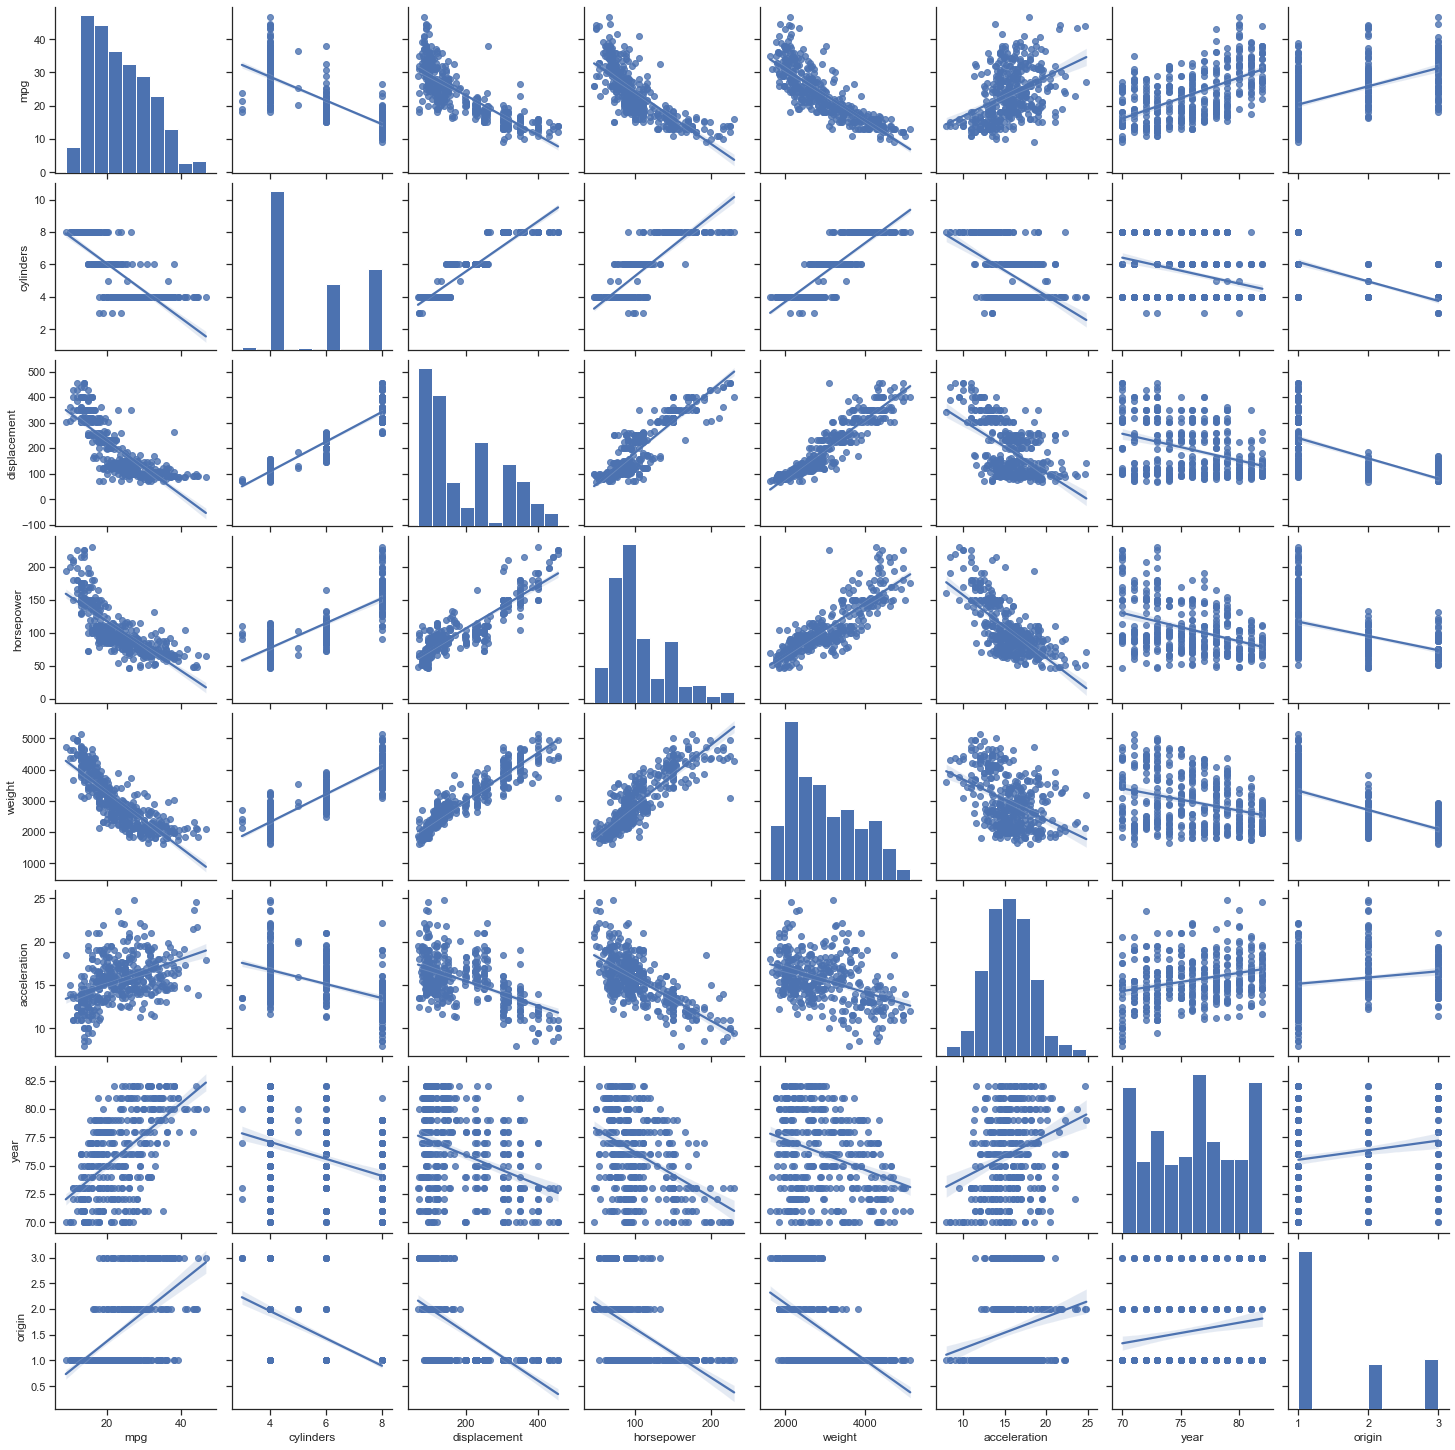

In [80]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, kind="reg");

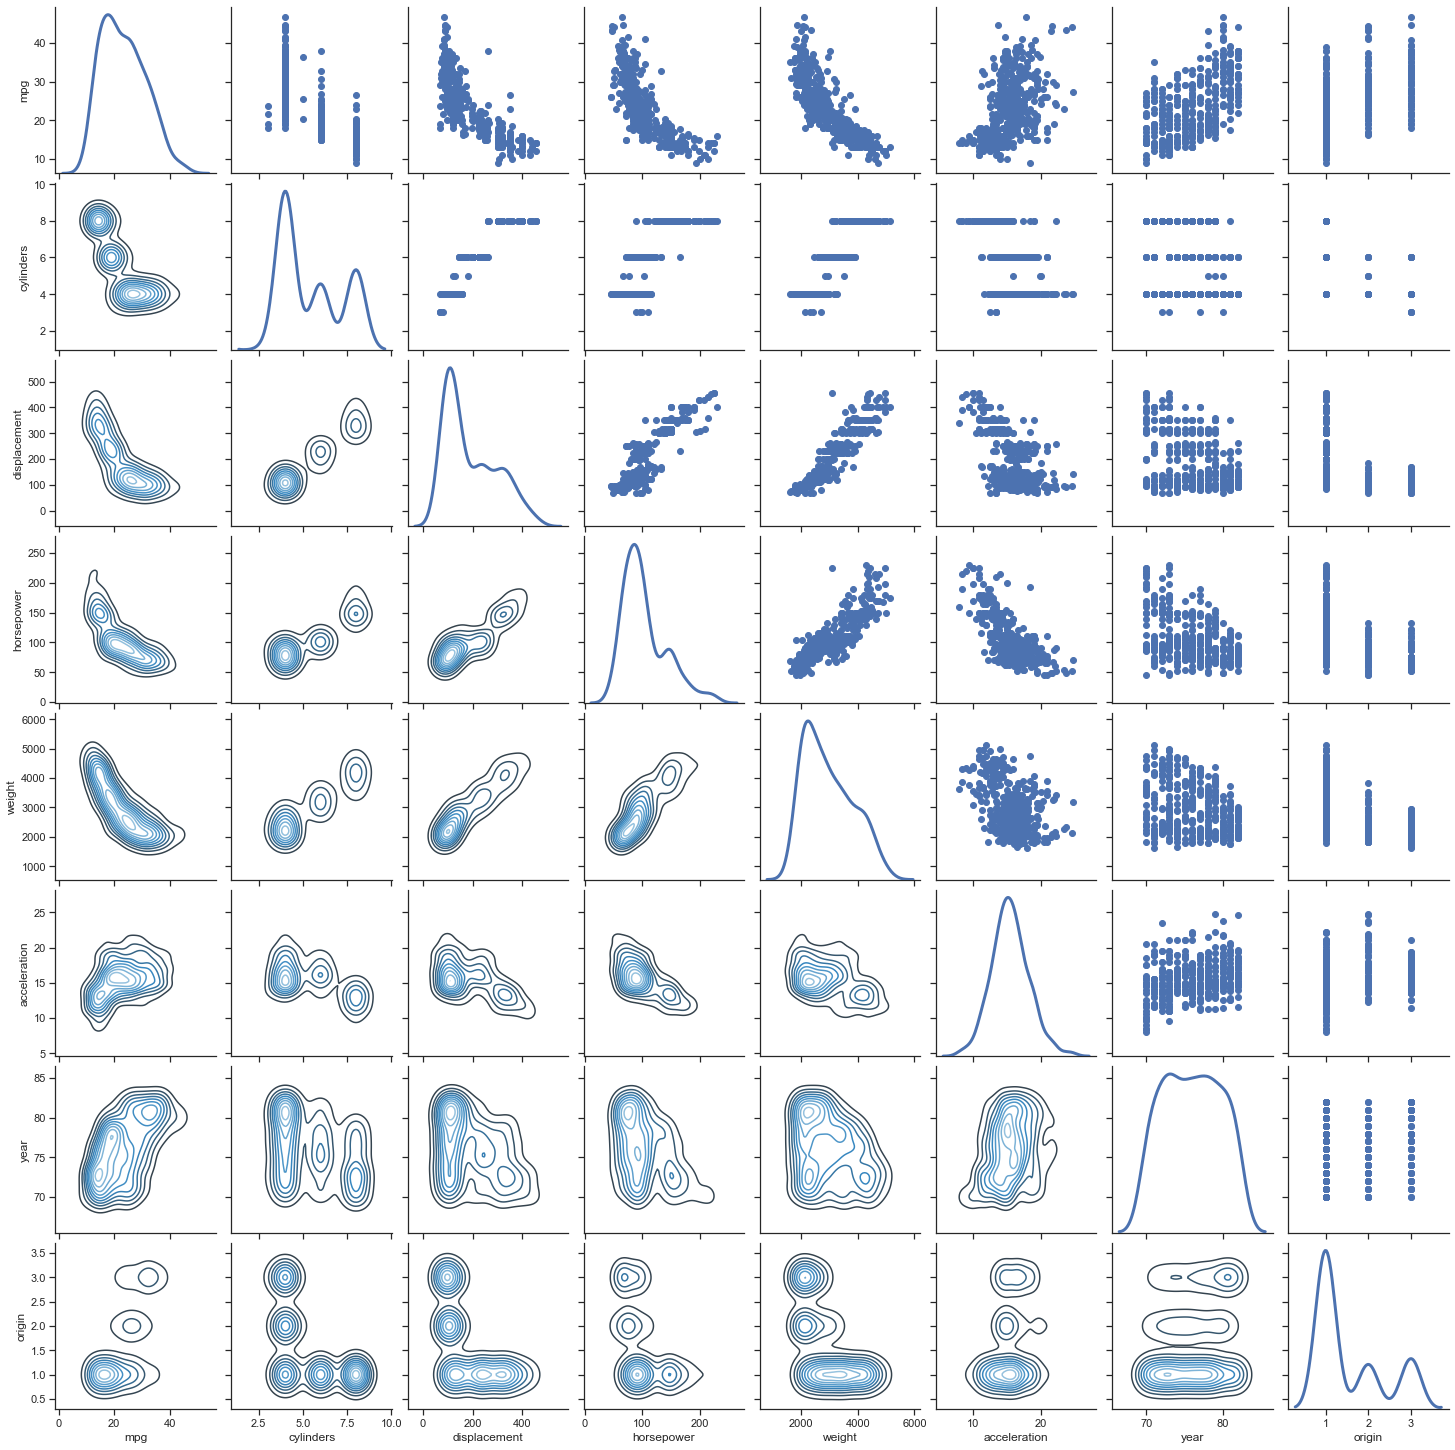

In [127]:
# http://seaborn.pydata.org/generated/seaborn.PairGrid.html

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

### (b) 
<font color='blue'> *Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.* </font>

In [81]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [94]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.771441 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.839715  0.897017   
displacement -0.804443   0.950920      1.000000    0.893833  0.933104   
horsepower   -0.771441   0.839715      0.893833    1.000000  0.860581   
weight       -0.831739   0.897017      0.933104    0.860581  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.687039 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.413022 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.453962 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.687039 -0.413022 -0.453962  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  
year              0.282901  1.000000  0.184314  
origin            0.210084  0.184314  1.000000

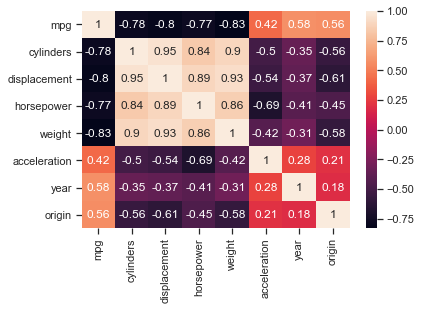

In [95]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### (c) 
<font color='blue'> *Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:* </font>

**Statsmodel ile simple lineer regression model kuruyorum.**

In [109]:
import statsmodels.api as sm

##### <font color='green'>name değişkeni üzerinde one-hot encoding yaparak modeli kurdum.</font>

**Bağımsız değişkeni belirliyorum.**

In [110]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [114]:
len(df["name"].unique())

304

In [115]:
df_one_hot = pd.get_dummies(df, columns = ["name"], prefix = ["name"]) 
df_one_hot.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin  name_amc ambassador brougham  name_amc ambassador dpl  ...  \
0       1                             0                        0  ...   
1       1                             0                        0  ...   
2       1                             0                        0  ...   
3       1                             0                        0  ...   
4       1                             0                        0  ...   

   name_volvo 145e (sw)  name_volvo 244dl  name_volvo 245  name_volvo 264gl  \
0                     0                 0               0                 0   
1                     0                 0               0                 0   
2                     0                 0               0                 0   
3                     0                 0               0                 0   
4                     0                 0               0                 0   

   name_volvo diesel  name_vw dasher (diesel)  name_vw pickup  name_vw rabbit  \
0                  0                        0               0               0   
1                  0                        0               0               0   
2                  0                        0               0               0   
3                  0                        0               0               0   
4                  0                        0               0               0   

   name_vw rabbit c (diesel)  name_vw rabbit custom  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          0                      0  
4                          0                      0  

[5 rows x 312 columns]

In [118]:
X = df_one_hot.drop("mpg",axis=1)

X.head()

cylinders  displacement  horsepower  weight  acceleration  year  origin  \
0          8         307.0       130.0    3504          12.0    70       1   
1          8         350.0       165.0    3693          11.5    70       1   
2          8         318.0       150.0    3436          11.0    70       1   
3          8         304.0       150.0    3433          12.0    70       1   
4          8         302.0       140.0    3449          10.5    70       1   

   name_amc ambassador brougham  name_amc ambassador dpl  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   name_amc ambassador sst  ...  name_volvo 145e (sw)  name_volvo 244dl  \
0                        0  ...                     0                 0   
1                        0  ...                     0                 0   
2                        0  ...                     0                 0   
3                        0  ...                     0                 0   
4                        0  ...                     0                 0   

   name_volvo 245  name_volvo 264gl  name_volvo diesel  \
0               0                 0                  0   
1               0                 0                  0   
2               0                 0                  0   
3               0                 0                  0   
4               0                 0                  0   

   name_vw dasher (diesel)  name_vw pickup  name_vw rabbit  \
0                        0               0               0   
1                        0               0               0   
2                        0               0               0   
3                        0               0               0   
4                        0               0               0   

   name_vw rabbit c (diesel)  name_vw rabbit custom  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          0                      0  
4                          0                      0  

[5 rows x 311 columns]

**Bağımlı değişkeni belirliyorum.**

In [119]:
y = df_one_hot["mpg"]

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Statsmodelde bir de sabit eklemem gerekiyor modeli kurabilmek için.**

In [121]:
X = sm.add_constant(X)

In [122]:
X.head()

const  cylinders  displacement  horsepower  weight  acceleration  year  \
0    1.0          8         307.0       130.0    3504          12.0    70   
1    1.0          8         350.0       165.0    3693          11.5    70   
2    1.0          8         318.0       150.0    3436          11.0    70   
3    1.0          8         304.0       150.0    3433          12.0    70   
4    1.0          8         302.0       140.0    3449          10.5    70   

   origin  name_amc ambassador brougham  name_amc ambassador dpl  ...  \
0       1                             0                        0  ...   
1       1                             0                        0  ...   
2       1                             0                        0  ...   
3       1                             0                        0  ...   
4       1                             0                        0  ...   

   name_volvo 145e (sw)  name_volvo 244dl  name_volvo 245  name_volvo 264gl  \
0                     0                 0               0                 0   
1                     0                 0               0                 0   
2                     0                 0               0                 0   
3                     0                 0               0                 0   
4                     0                 0               0                 0   

   name_volvo diesel  name_vw dasher (diesel)  name_vw pickup  name_vw rabbit  \
0                  0                        0               0               0   
1                  0                        0               0               0   
2                  0                        0               0               0   
3                  0                        0               0               0   
4                  0                        0               0               0   

   name_vw rabbit c (diesel)  name_vw rabbit custom  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          0                      0  
4                          0                      0  

[5 rows x 312 columns]

**Modeli kuruyorum.**

In [125]:
lm = sm.OLS(y,X)
model = lm.fit()

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     14.78
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.88e-33
Time:                        14:01:52   Log-Likelihood:                -589.62
No. Observations:                 397   AIC:                             1799.
Df Residuals:                      87   BIC:                             3034.
Df Model:                         309                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.7977     10.057      0.079      0.937     -19.191      20.786
cylinders                                    -0.7963      0.615     -1.295      0.199      -2.018       0.426
displacement                                 -0.0053      0.015     -0.365      0.716      -0.034       0.024
horsepower                                   -0.0197      0.025     -0.776      0.440      -0.070       0.031
weight                                       -0.0044      0.001     -3.680      0.000      -0.007      -0.002
acceleration                                 -0.3873      0.163     -2.379      0.020      -0.711      -0.064
year                                          0.6351      0.112      5.660      0.000       0.412       0.858
origin                                        0.7296      0.811      0.899      0.371      -0.883       2.342
name_amc ambassador brougham                 -1.9734      2.566     -0.769      0.444      -7.073       3.126
name_amc ambassador dpl                       1.5474      2.653      0.583      0.561      -3.725       6.820
name_amc ambassador sst                       1.4048      2.490      0.564      0.574      -3.545       6.355
name_amc concord                             -2.0965      1.746     -1.201      0.233      -5.567       1.374
name_amc concord d/l                         -3.5007      2.311     -1.515      0.133      -8.094       1.093
name_amc concord dl 6                        -2.2069      2.372     -0.930      0.355      -6.922       2.509
name_amc gremlin                             -2.1498      1.378     -1.560      0.122      -4.888       0.589
name_amc hornet                              -1.5368      1.291     -1.190      0.237      -4.104       1.030
name_amc hornet sportabout (sw)              -1.9558      2.418     -0.809      0.421      -6.762       2.851
name_amc matador                             -1.2862      1.178     -1.091      0.278      -3.629       1.056
name_amc matador (sw)                         1.0207      1.999      0.511      0.611      -2.953       4.995
name_amc pacer                               -1.5703      2.355     -0.667      0.507      -6.252       3.111
name_amc pacer d/l                           -3.2385      2.427     -1.334      0.186      -8.062       1.585
name_amc rebel sst                            0.8101      2.530      0.320      0.750      -4.218       5.839
name_amc spirit dl                           -1.2620      2.671     -0.472      0.638      -6.572       4.048
name_audi 100 ls                             -0.8096      2.498     -0.324      0.747      -5.774       4.154
name_audi 100ls                              -4.8298      1.819     -2.655      0.009      -8.445      -1.214
nam

##### <font color='green'>name değişkenini çıkararak modeli kurdum.</font>

**Bağımsız değişkeni belirliyorum.**

In [128]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [130]:
X = df.drop(["mpg","name"],axis=1)

X.head()

cylinders  displacement  horsepower  weight  acceleration  year  origin
0          8         307.0       130.0    3504          12.0    70       1
1          8         350.0       165.0    3693          11.5    70       1
2          8         318.0       150.0    3436          11.0    70       1
3          8         304.0       150.0    3433          12.0    70       1
4          8         302.0       140.0    3449          10.5    70       1

**Bağımlı değişkeni belirliyorum.**

In [131]:
y = df["mpg"]

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Statsmodelde bir de sabit eklemem gerekiyor modeli kurabilmek için.**

In [132]:
X = sm.add_constant(X)

In [133]:
X.head()

const  cylinders  displacement  horsepower  weight  acceleration  year  \
0    1.0          8         307.0       130.0    3504          12.0    70   
1    1.0          8         350.0       165.0    3693          11.5    70   
2    1.0          8         318.0       150.0    3436          11.0    70   
3    1.0          8         304.0       150.0    3433          12.0    70   
4    1.0          8         302.0       140.0    3449          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

**Modeli kuruyorum.**

In [134]:
lm = sm.OLS(y,X)
model = lm.fit()

In [135]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          2.41e-141
Time:                        14:33:35   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i.

<font color='blue'>*Is there a relationship between the predictor and the response?*</font>

Tahmin ediciler ile yanıt arasında bir ilişki var. Çünkü F-istatistik değerine baktığımızda 256, 1'den büyük. Dolayısıyla ilgili null hipotezi reddedebiliriz.

````
H0:βcylinders=βdisplacement=βweight=βacceleration=βyear=βorigin=0.
````

H0 doğruysa bu verinin üretilme olasılığı Prob(F−Statistic)=2×10−141, gülünç derecede düşük bir değerdir.

#### ii.

<font color='blue'>*Which predictors appear to have a statistically significant relationship to the response?*</font>

Katsayılara baktığımızda `displacement, weight, year, origin` değişkenlerinin p-value'larını 0.05'ten küçük görüyoruz. Bu yüzden bu değişkenler mpg ile ilişkili görünüyor.

#### iii.

<font color='blue'>*What does the coefficient for the `year` variable suggest?*</font>

Katsayı, ortalama olarak, diğer değişkenler sabit tutulduğunda, bir yıllık (üretim) artışın, 0.76 mpg'lik bir artışa karşılık geldiğini ileri sürer.

In [139]:
df["year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

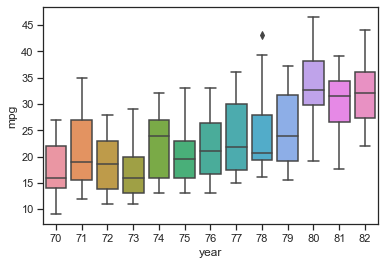

In [140]:
sns.boxplot(x = "year", y = "mpg", data = df);

### (d) 
<font color='blue'> *Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?* </font>

### (e) 
<font color='blue'> *Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?* </font>

In [141]:
import statsmodels.api as sm

**Bağımsız değişkeni belirliyorum.**

Dataframe'e interaction terimleri ekliyorum. 

In [142]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.771441 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.839715  0.897017   
displacement -0.804443   0.950920      1.000000    0.893833  0.933104   
horsepower   -0.771441   0.839715      0.893833    1.000000  0.860581   
weight       -0.831739   0.897017      0.933104    0.860581  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.687039 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.413022 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.453962 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.687039 -0.413022 -0.453962  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  
year              0.282901  1.000000  0.184314  
origin            0.210084  0.184314  1.000000

In [150]:
df["displacement*cylinders"] = df["displacement"]*df["cylinders"]

df.head()
# pd.concat([df,df["displacement"]*df["cylinders"]],axis=1)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  displacement*cylinders  
0       1  chevrolet chevelle malibu                  2456.0  
1       1          buick skylark 320                  2800.0  
2       1         plymouth satellite                  2544.0  
3       1              amc rebel sst                  2432.0  
4       1                ford torino                  2416.0

In [151]:
X = df.drop(["mpg","name"],axis=1)

X.head()

cylinders  displacement  horsepower  weight  acceleration  year  origin  \
0          8         307.0       130.0    3504          12.0    70       1   
1          8         350.0       165.0    3693          11.5    70       1   
2          8         318.0       150.0    3436          11.0    70       1   
3          8         304.0       150.0    3433          12.0    70       1   
4          8         302.0       140.0    3449          10.5    70       1   

   displacement*cylinders  
0                  2456.0  
1                  2800.0  
2                  2544.0  
3                  2432.0  
4                  2416.0

**Bağımlı değişkeni belirliyorum.**

In [152]:
y = df["mpg"]

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Statsmodelde bir de sabit eklemem gerekiyor modeli kurabilmek için.**

In [157]:
X = sm.add_constant(X)

In [158]:
X.head()

const  cylinders  displacement  horsepower  weight  acceleration  year  \
0    1.0          8         307.0       130.0    3504          12.0    70   
1    1.0          8         350.0       165.0    3693          11.5    70   
2    1.0          8         318.0       150.0    3436          11.0    70   
3    1.0          8         304.0       150.0    3433          12.0    70   
4    1.0          8         302.0       140.0    3449          10.5    70   

   origin  displacement*cylinders  
0       1                  2456.0  
1       1                  2800.0  
2       1                  2544.0  
3       1                  2432.0  
4       1                  2416.0

**Modeli kuruyorum.**

In [159]:
lm = sm.OLS(y,X)
model = lm.fit()

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     267.0
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.26e-152
Time:                        15:35:28   Log-Likelihood:                -1007.9
No. Observations:                 397   AIC:                             2034.
Df Residuals:                     388   BIC:                             2070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.2248      4.661     -0.906      0.365     -13.388       4.939
cylinders                 -2.6365      0.409     -6.452      0.000      -3.440      -1.833
displacement              -0.0783      0.014     -5.533      0.000      -0.106      -0.051
horsepower                -0.0399      0.013     -3.092      0.002      -0.065      -0.015
weight                    -0.0055      0.001     -8.939      0.000      -0.007      -0.004
acceleration               0.0982      0.090      1.091      0.276      -0.079       0.275
year                       0.7709      0.047     16.390      0.000       0.678       0.863
origin                     0.6749      0.272      2.483      0.013       0.141       1.209
displacement*cylinders     0.0136      0.002      7.890      0.000       0.010       0.017
==============================================================================
Omnibus:                       33.121   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.138
Skew:                           0.411   Prob(JB):                     3.97e-18
Kurtosis:                       5.042   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`displacement*cylinders` interaction terimini modele soktuğumuzda anlamlı bir katsayı verdi bize. Bir birimlik displacement*cylinders artışında 0.0136 birim mpg artışı olacağını söyleyebiliriz.

R-squaredleri karşılaştırdığımızda model etkileşim terimini içermediğinde 0.822 değerini verirken etkileşim terimini içerdiğinde 0.846 değerini veriyor. 

In [162]:
(0.846-0.822)/(1-0.822)

0.13483146067415738

Bu additive model fit edildikten sonra değişkenliğin %13'ünün etkileşim terimi ile açıklandığını gösterir.

### (f) 
<font color='blue'> *Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.* </font>

residual plotını çiz, burada nonlineerlik görüyrsak logx vs. yapıyorduk.